#### data 에 관해서는 https://www.uplift-modeling.com/en/latest/api/datasets/fetch_lenta.html

In [1]:
pwd

'C:\\Users\\campus2H018\\Downloads\\db_week4'

In [3]:
import pandas as pd

df = pd.read_csv('./lenta_dataset.csv',encoding = 'utf-8')

In [5]:
df.head()

,is_treatment,response_att,food_share_15d,age,is_women
0,1,0,0.0000,33.0,1
1,0,0,0.0000,63.0,1
2,1,0,0.0000,51.0,1
3,0,0,0.0000,38.0,1
4,1,0,0.5105,20.0,1


### 변수 설명
* is_treatment : 고객에게 SMS를 발송한 경우는 1, 아니면 0
* response_att : treatment를 한 후, 점포에 방문하면 1, 아니면 0
* food_share_15d : 구입한 경우의 식료품 비율

In [9]:
df.groupby('is_treatment')['age'].mean()

is_treatment
0    43.578986
1    43.803353
Name: age, dtype: float64

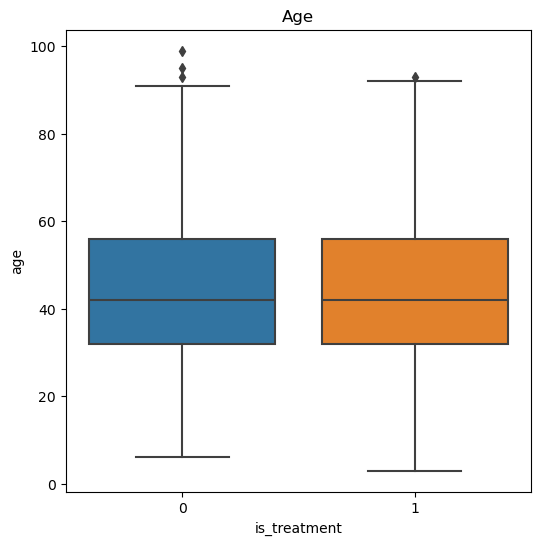

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.boxplot(x='is_treatment', y='age', data=df)
plt.title('Age')
plt.show()

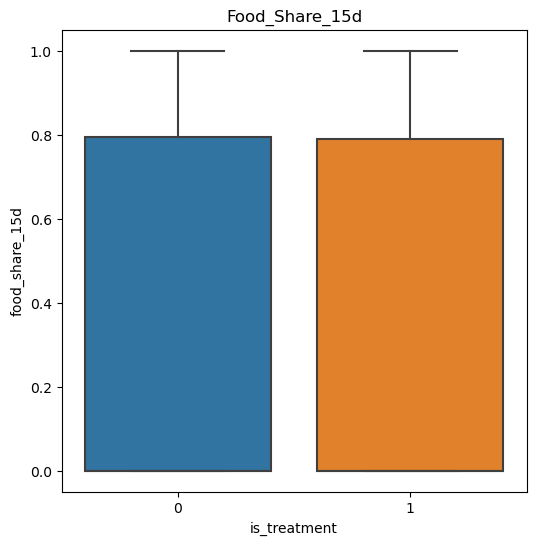

In [13]:
plt.figure(figsize=(6,6))
sns.boxplot(x='is_treatment', y='food_share_15d', data=df)
plt.title('Food_Share_15d')
plt.show()

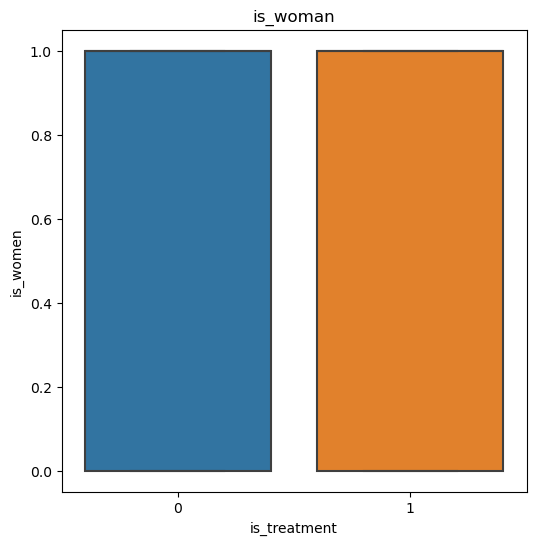

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(x='is_treatment', y='is_women', data=df)
plt.title('is_woman')
plt.show()

In [17]:
df.groupby('is_treatment')['is_women'].mean()

is_treatment
0    0.618734
1    0.629673
Name: is_women, dtype: float64

In [23]:
# treatment여부에 따라 가게에 들리는 비율이 차이나는 지를 알아보자

df.groupby('is_treatment')['response_att'].mean()*100

is_treatment
0    10.236412
1    11.145897
Name: response_att, dtype: float64

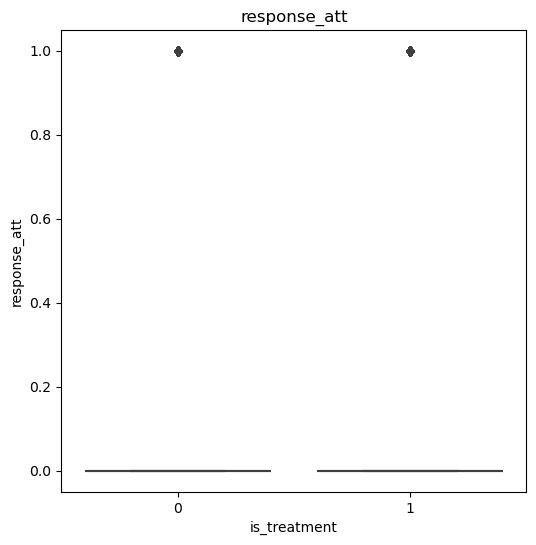

In [25]:
plt.figure(figsize=(6,6))
sns.boxplot(x='is_treatment', y='response_att', data=df)
plt.title('response_att')
plt.show()

In [27]:
# 참고 독립표본 t-test

from scipy.stats import ttest_ind

ttest_ind(df['is_treatment'], df['response_att'])

TtestResult(statistic=271.0068568866237, pvalue=0.0, df=99998.0)